### Курсовой проект для курса "Python для Data Science"

**Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).**

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
1. R2 > 0.6
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки сдачи:
Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.metrics import r2_score

**Пути к директориям и файлам**

In [2]:
MODEL_DATASET_PATH = 'C:\\Users\\User\\Desktop\\py4dataS\\train.csv'
PREDICT_DATASET_PATH = 'C:\\Users\\User\\Desktop\\py4dataS\\test.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [3]:
df = pd.read_csv(MODEL_DATASET_PATH)
df_pred = pd.read_csv(PREDICT_DATASET_PATH)

### Обработка пропусков

In [4]:
def df_notnull(any_df):
    any_df.loc[any_df['LifeSquare'].isnull(), 'LifeSquare'] = any_df['LifeSquare'].median()
    any_df.loc[any_df['Healthcare_1'].isnull(), 'Healthcare_1'] = any_df['Healthcare_1'].median()
    return any_df

In [5]:
df_notnull(df)
df.info()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,900.0,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,900.0,1,5,B,296021.204377
7,11993,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,900.0,0,2,B,221244.156664
8,5172,1,2.0,64.511437,32.781260,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,900.0,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,900.0,0,2,B,95380.220993


In [6]:
df_notnull(df_pred)
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


### Обработка выбросов

In [7]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**Square**

Жилая площадь не может быть меньше, чем общая

In [9]:
df.loc[((df['Square'] - df['LifeSquare']) < -5) == True] 
# если разница меньше 5м, скорее всего, ошибка ввода либо обработки пропусков и можно ею пренебречь,
# более - скорее всего, поменяли местами жилую и общую площадь

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
501,15923,27,1.0,26.553188,32.781260,0.0,25,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,114256.236153
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,900.0,0,2,B,141780.231857
900,8940,34,1.0,26.811587,32.781260,0.0,18,0.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,175399.643453
1184,3902,23,1.0,27.442238,32.781260,1.0,4,4.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,65547.071846
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,900.0,0,1,B,97560.720383
3954,5210,27,1.0,27.245731,32.781260,1.0,8,16.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,74982.605917
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B,217357.492366
4638,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,211324.917957
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,900.0,0,1,B,104891.073757


In [10]:
df.loc[4328, "LifeSquare"] = df.loc[4328, "Square"]
df.loc[8437, "LifeSquare"] = df.loc[8437, "Square"]
df.loc[((df['Square'] - df['LifeSquare']) < -5) == True, 'Square'] = df['LifeSquare']

In [12]:
df.loc[df['Square'] < 7] # самая маленькая из описанных квартир

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,181434.825589
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,458378.777006
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,900.0,3,2,B,438005.182323
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083


In [13]:
df.loc[df['Square'] < 7, 'Square'] = df['Square'].median()

In [14]:
df_pred.loc[((df_pred['Square'] - df_pred['LifeSquare']) < -5) == True] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,900.0,0,0,B
1436,12833,27,1.0,27.658462,32.925087,0.0,10,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
4234,15846,34,1.0,26.719723,32.925087,1.0,4,2.0,2015,0.069753,B,B,53,13670,4,900.0,1,11,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [15]:
#df_pred.loc[4713, "Square"] = df_pred.loc[4713, "LifeSquare"]
df_pred.loc[410, "LifeSquare"] = df_pred.loc[410, "Square"]
df.loc[((df['Square'] - df['LifeSquare']) < -5) == True, 'Square'] = df['LifeSquare']

**year**

In [16]:
df[(df['HouseYear'] <= 1000) | (df['HouseYear'] > 2030)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [17]:
# обработаем вручную
df.loc[1497, "HouseYear"] = 2005
df.loc[4189, "HouseYear"] = 1968

In [18]:
df_pred[(df_pred['HouseYear'] <= 1000) | (df_pred['HouseYear'] > 2030)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


### Отбор и построение новых признаков

**Преобразуем категориальные признаки в бинарные**

In [19]:
def df_binars(any_df):
    any_df = pd.concat([any_df, pd.get_dummies(any_df['Ecology_2'])], axis=1)
    any_df = any_df.rename(columns = {'A':'Ecology_2_A', 'B': 'Ecology_2_B'})
    any_df = pd.concat([any_df, pd.get_dummies(any_df['Ecology_3'])], axis=1)
    any_df = any_df.rename(columns = {'A':'Ecology_3_A', 'B': 'Ecology_3_B'})
    any_df = pd.concat([any_df, pd.get_dummies(any_df['Shops_2'])], axis=1)
    any_df = any_df.rename(columns = {'A':'Shops_2_A', 'B': 'Shops_2_B'})
    return any_df

In [20]:
df = df_binars(df)
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [21]:
df_pred = df_binars(df_pred)

df_pred.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Ecology_2_A', 'Ecology_2_B',
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

**Распределение цены в зависимости от района.**
Обычно в любом городе существуют дешевые районы и дорогие, и от района зависит цена квадратного метра. 
Сгруппируем значения, отсортируем, введем переменную, которая будет возрастать вместе с ценой квадратного метра в районе, и построим график

In [22]:
price_sq_district = df.groupby(['DistrictId'], as_index=False).agg({'Square': 'sum', 'Price': 'sum'})
price_sq_district["Price_1sq"] = price_sq_district["Price"] / price_sq_district["Square"]
price_sq_district = price_sq_district.sort_values('Price_1sq')
price_sq_district['District_price_index'] = np.arange(0, 205)

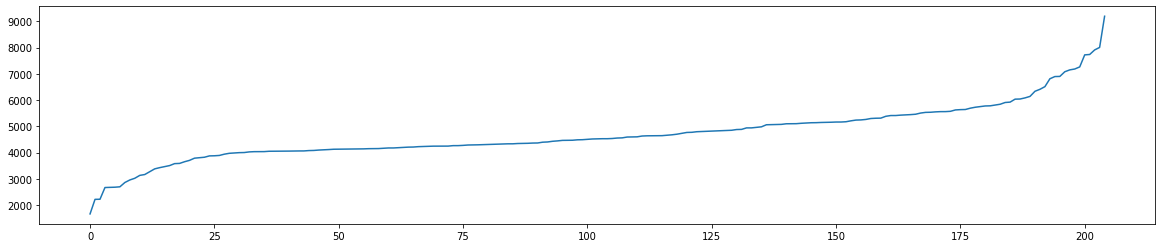

In [23]:
plt.figure(figsize=(20, 4))
x = price_sq_district['District_price_index']
y = price_sq_district['Price_1sq']
plt.plot(x, y)
plt.show()

In [24]:
price_sq_district.drop('Square', axis=1, inplace=True)
price_sq_district.drop('Price', axis=1, inplace=True)
price_sq_district.drop('Price_1sq', axis=1, inplace=True)

In [25]:
df = pd.merge(df, price_sq_district, on='DistrictId', how='left')
df_pred = pd.merge(df_pred, price_sq_district, on='DistrictId', how='left')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 27 columns):
Id                      10000 non-null int64
DistrictId              10000 non-null int64
Rooms                   10000 non-null float64
Square                  10000 non-null float64
LifeSquare              10000 non-null float64
KitchenSquare           10000 non-null float64
Floor                   10000 non-null int64
HouseFloor              10000 non-null float64
HouseYear               10000 non-null int64
Ecology_1               10000 non-null float64
Ecology_2               10000 non-null object
Ecology_3               10000 non-null object
Social_1                10000 non-null int64
Social_2                10000 non-null int64
Social_3                10000 non-null int64
Healthcare_1            10000 non-null float64
Helthcare_2             10000 non-null int64
Shops_1                 10000 non-null int64
Shops_2                 10000 non-null object
Price               

In [27]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
Id                      5000 non-null int64
DistrictId              5000 non-null int64
Rooms                   5000 non-null float64
Square                  5000 non-null float64
LifeSquare              5000 non-null float64
KitchenSquare           5000 non-null float64
Floor                   5000 non-null int64
HouseFloor              5000 non-null float64
HouseYear               5000 non-null int64
Ecology_1               5000 non-null float64
Ecology_2               5000 non-null object
Ecology_3               5000 non-null object
Social_1                5000 non-null int64
Social_2                5000 non-null int64
Social_3                5000 non-null int64
Healthcare_1            5000 non-null float64
Helthcare_2             5000 non-null int64
Shops_1                 5000 non-null int64
Shops_2                 5000 non-null object
Ecology_2_A             5000 non-null ui

In [28]:
pd.set_option('display.max_columns', None)
df_pred[df_pred['District_price_index'].isnull()]   #районы, отсутствующие в числе наблюдений

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,District_price_index
51,15748,212,2.0,75.655182,36.877626,15.0,2,7.0,1929,0.000000e+00,B,B,8,1423,37,562.0,1,8,B,0,1,0,1,0,1,NaN
1043,14939,210,2.0,54.953826,31.223917,6.0,3,10.0,1956,8.194346e-02,B,B,20,2738,20,900.0,1,4,B,0,1,0,1,0,1,NaN
1475,16217,206,4.0,76.428426,50.344903,11.0,7,6.0,1912,4.203159e-02,B,B,37,6856,84,1940.0,2,5,B,0,1,0,1,0,1,NaN
2323,9155,204,3.0,88.559337,62.854221,8.0,8,7.0,1918,3.731645e-02,B,B,32,6748,93,562.0,4,10,B,0,1,0,1,0,1,NaN
2370,8845,203,2.0,50.417709,27.587971,7.0,5,4.0,1977,1.501689e-02,B,B,17,3079,59,2890.0,0,8,B,0,1,0,1,0,1,NaN
2666,15655,211,2.0,46.501558,32.276987,5.0,5,5.0,1965,1.800000e-09,B,B,16,3681,73,1815.0,2,5,B,0,1,0,1,0,1,NaN
3668,13382,206,2.0,46.047289,27.384090,6.0,5,7.0,1930,7.815280e-05,B,B,22,6398,141,1046.0,3,23,B,0,1,0,1,0,1,NaN
4046,14024,198,2.0,47.477281,31.069466,5.0,2,5.0,1970,6.076152e-03,B,B,30,5285,0,645.0,6,6,B,0,1,0,1,0,1,NaN


In [29]:
#находим районы с такими же параметрами (по Social_2, остальные проверяем) и устанавливаем индекс самого частого района
def df_pred_fill(soc2_num):
    df_soc2 = df[df['Social_2'] == soc2_num] 
    return df_soc2['District_price_index'].value_counts()
df_pred_fill(1423)

204    2
1      1
Name: District_price_index, dtype: int64

In [30]:
df_pred.loc[51, 'District_price_index'] = 204
df_pred_fill(2738)

164    7
195    5
194    3
174    2
203    2
Name: District_price_index, dtype: int64

In [31]:
df_pred.loc[1043, 'District_price_index'] = 164
df_pred_fill(6856)

198    17
130    15
139     7
99      3
1       1
Name: District_price_index, dtype: int64

In [32]:
df_pred.loc[1475, 'District_price_index'] = 198
df_pred_fill(6748)

96     8
182    5
175    4
158    2
82     2
149    1
179    1
196    1
193    1
Name: District_price_index, dtype: int64

In [33]:
df_pred.loc[2323, 'District_price_index'] = 96
df_pred_fill(3079)

161    12
106     5
202     3
149     2
176     2
200     1
Name: District_price_index, dtype: int64

In [34]:
df_pred.loc[2370, 'District_price_index'] = 161
df_pred_fill(3681)

168    4
137    3
188    1
170    1
196    1
Name: District_price_index, dtype: int64

In [35]:
df_pred.loc[2666, 'District_price_index'] = 168
df_pred_fill(6398)

5      228
202      5
148      5
189      4
99       2
191      1
Name: District_price_index, dtype: int64

In [36]:
df_pred.loc[3668, 'District_price_index'] = 5
df_pred_fill(5285)

45     38
95     37
17     17
109     5
42      2
Name: District_price_index, dtype: int64

In [37]:
df_pred.loc[4046, 'District_price_index'] = 45 # как сделать в одну функцию?

In [38]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
Id                      5000 non-null int64
DistrictId              5000 non-null int64
Rooms                   5000 non-null float64
Square                  5000 non-null float64
LifeSquare              5000 non-null float64
KitchenSquare           5000 non-null float64
Floor                   5000 non-null int64
HouseFloor              5000 non-null float64
HouseYear               5000 non-null int64
Ecology_1               5000 non-null float64
Ecology_2               5000 non-null object
Ecology_3               5000 non-null object
Social_1                5000 non-null int64
Social_2                5000 non-null int64
Social_3                5000 non-null int64
Healthcare_1            5000 non-null float64
Helthcare_2             5000 non-null int64
Shops_1                 5000 non-null int64
Shops_2                 5000 non-null object
Ecology_2_A             5000 non-null ui

In [39]:
df.Square.describe()

count    10000.000000
mean        56.417706
std         21.104394
min         13.784865
25%         41.794392
50%         52.538671
75%         65.927434
max        641.065193
Name: Square, dtype: float64

**Подготовка к обучению**

In [40]:
y = df['Price']

In [41]:
def X_prepare(any_df): 
    X = any_df.copy()
    X['Id'] = X['Id'].astype(str)
    X.drop('Ecology_2', axis=1, inplace=True) # заменен бинарной переменной
    X.drop('Ecology_3', axis=1, inplace=True) # заменен бинарной переменной
    X.drop('Ecology_2_B', axis = 1, inplace = True) # колинеарен Ecology_2_A
    X.drop('Ecology_3_B', axis = 1, inplace = True) # колинеарен Ecology_3_A
    X.drop('Shops_2_B', axis = 1, inplace = True) # колинеарен Shops_2_A
    X.drop('Shops_2', axis=1, inplace=True) # заменен бинарной переменной
    X.drop('DistrictId', axis=1, inplace=True) # заменен показателем цены квадратного метра в районе
    X.drop('LifeSquare', axis = 1, inplace = True) # данные неполные и входят в общую площадь, показателем можно пренебречь 
    X.drop('KitchenSquare', axis = 1, inplace = True) # данные имеют нулевые и неправдоподобно малые значения и слабо влияют на целевую переменную
    X.drop('Healthcare_1', axis = 1, inplace = True) # данные неполные и слабо влияют на целевую переменную
    X['Floor'] = X['Floor'].astype('float64')
    X['HouseYear'] = X['HouseYear'].astype('float64')
    X['Social_1'] = X['Social_1'].astype('float64')
    X['Social_2'] = X['Social_2'].astype('float64')
    X['Social_3'] = X['Social_3'].astype('float64')
    X['Helthcare_2'] = X['Helthcare_2'].astype('float64')
    X['Shops_1'] = X['Shops_1'].astype('float64')
    X['Ecology_2_A'] = X['Ecology_2_A'].astype('float64')
    X['Ecology_3_A'] = X['Ecology_3_A'].astype('float64')
    X['Shops_2_A'] = X['Shops_2_A'].astype('float64')
    X['District_price_index'] = X['District_price_index'].astype('float64')
    return X

In [42]:
X = X_prepare(df)

In [43]:
X.drop('Price', axis = 1, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
Id                      10000 non-null object
Rooms                   10000 non-null float64
Square                  10000 non-null float64
Floor                   10000 non-null float64
HouseFloor              10000 non-null float64
HouseYear               10000 non-null float64
Ecology_1               10000 non-null float64
Social_1                10000 non-null float64
Social_2                10000 non-null float64
Social_3                10000 non-null float64
Helthcare_2             10000 non-null float64
Shops_1                 10000 non-null float64
Ecology_2_A             10000 non-null float64
Ecology_3_A             10000 non-null float64
Shops_2_A               10000 non-null float64
District_price_index    10000 non-null float64
dtypes: float64(15), object(1)
memory usage: 1.3+ MB


In [44]:
X_pred = X_prepare(df_pred)

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

### Построение базовых моделей и выбор лучшей

**Линейная регрессия**

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred_lr = lr.predict(X_test)

In [49]:
r2_score(y_test, y_pred_lr)

0.6280444421454041

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [51]:
lr.fit(X_train_scaled, y_train)
y_pred_scaled = lr.predict(X_test_scaled)
r2_score(y_test, y_pred_scaled)

0.6336669225746994

**Случайный лес**

In [52]:
rfr = RandomForestRegressor(random_state=30)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
r2_score(y_test, y_pred_rfr)

0.7281865004383727

**GradientBoosting**

In [53]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
r2_score(y_test, y_pred_gbr)

0.7557623041039963

**Подбор гиперпараметров**

In [54]:
gb_model = GradientBoostingRegressor(random_state=25)
gb_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=25, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
#%%time
params = {'n_estimators':[50, 100, 200], 
          'max_depth':[3, 5, 7]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=25, shuffle=True), n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=25, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                            

In [56]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [57]:
gs.best_score_

0.7563386309793984

### Предсказание

In [58]:
X_pred['Price'] = gs.predict(X_pred)

In [59]:
X_pred['Id'] = X_pred['Id'].astype('int64')

In [60]:
X_pred.loc[:, ['Id', 'Price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Id       5000 non-null int64
Price    5000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 117.2 KB


In [61]:
preds = X_pred.loc[:, ['Id', 'Price']]

In [62]:
preds.head(5)

,Id,Price
0,725,159446.801470
1,15856,215679.591680
2,5480,317334.983745
3,15664,342675.073015
4,14275,138912.759211


In [64]:
preds.to_csv('OBerezovskaya__predictions.csv', index=None)